In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2 
import imghdr
import os 
import tensorflow  
from matplotlib import pyplot as plt


In [ ]:
data_dir = "/content/drive/MyDrive/plant_data(2)"

In [ ]:
os.listdir(data_dir) #This is used to list the classes in the folder/


['Aloe Vera',
 'Areca Palm',
 'Money Plant',
 'Peace Lily',
 'Philodendron',
 'Rubber Plant',
 'Snake Plant',
 'Spider Plant',
 'Tulsi',
 'ZZ Plant']

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)
  

Aloe Vera
Areca Palm
Money Plant
Peace Lily
Philodendron
Rubber Plant
Snake Plant
Spider Plant
Tulsi
ZZ Plant


In [ ]:
#Converting each file from .jpg to .jpeg as tensor flow is only able to recognize .jpeg extension
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    if image.endswith('.png'):
      new_file_name = os.path.join(data_dir,image_class,image.replace(".png",".jpeg"))
      os.rename(os.path.join(data_dir,image_class,image),new_file_name)
    

In [ ]:
j=0
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    with tf.io.gfile.GFile(image_path, 'rb') as f: #Read images in binary fomat
      image_data = f.read()

      # Decode image
      try:
          image = tf.io.decode_image(image_data) 
          # image = tf.d
          print("Image is in a supported format.")
      except:
          print("Image is not in a supported format.")
          j = j+1
          os.remove(image_path)
print(j)
    

Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt

In [ ]:
image_size = 224 
batch_size = 64 

#Data Augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.1)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.1)



In [ ]:
train_data = train_datagen.flow_from_directory(data_dir, target_size = (image_size,image_size),batch_size=batch_size,subset='training')
test_data = test_datagen.flow_from_directory(data_dir, target_size = (image_size,image_size),batch_size=batch_size,subset='validation')

Found 3515 images belonging to 10 classes.
Found 386 images belonging to 10 classes.


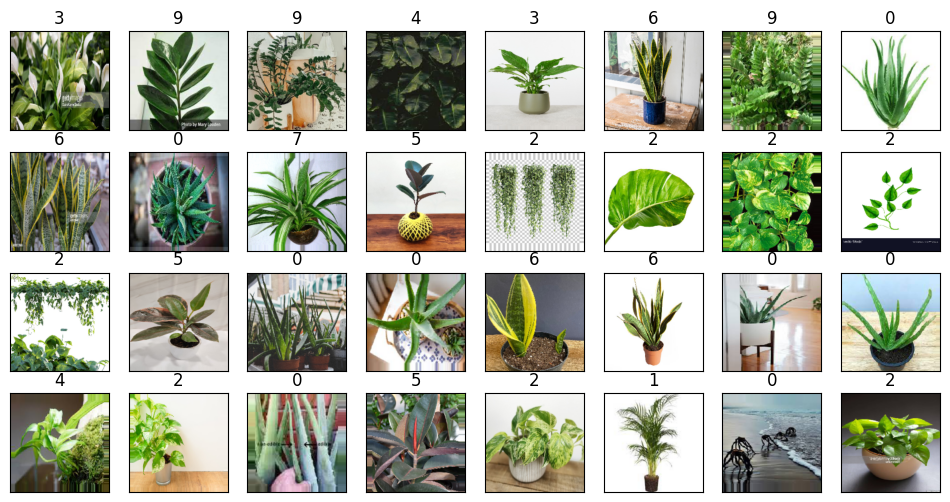

In [ ]:
x_batch, y_batch = train_data.next()

# Display the images in the batch
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_batch[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(str(np.argmax(y_batch[i])))
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [ ]:
cnn = Sequential() 

In [ ]:
cnn.add(Conv2D(64,(3,3),1, padding='same',activation='relu',input_shape=(224,224,3),kernel_initializer='he_uniform'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D()) #Default is (2,2) therefore reduces the dimentsions by 2

cnn.add(Conv2D(32, (3,3), 1,padding='same', activation='relu', kernel_initializer='he_uniform',kernel_regularizer = tf.keras.regularizers.l1(0.001) ))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D()) #It reduces dimensions by half (2,2)

cnn.add(Conv2D(32, (3,3), 1, activation='relu', padding='same', kernel_initializer='he_uniform',kernel_regularizer = tf.keras.regularizers.l1(0.001) ))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D())

cnn.add(Flatten())

cnn.add(Dense(256,activation='relu', kernel_initializer = 'he_uniform',kernel_regularizer = tf.keras.regularizers.l1(0.01)))
cnn.add(Dense(10,activation='softmax'))




In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_3 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      18464     
                                                                 
 batch_normalization_4 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                      

In [ ]:
log_dir = '/content/drive/MyDrive/logs'



In [ ]:
tensorboard_callback = tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir) #This is to save your model to a folder called logs



In [ ]:
hist = cnn.fit(train_data, epochs=30, validation_data = test_data, callbacks=[tensorboard_callback])

Epoch 1/30
55/55 [==============================] - 101s 2s/step - loss: 127.7491 - accuracy: 0.1744 - val_loss: 27.4455 - val_accuracy: 0.0907
Epoch 2/30
55/55 [==============================] - 95s 2s/step - loss: 17.2684 - accuracy: 0.2040 - val_loss: 15.8802 - val_accuracy: 0.1528
Epoch 3/30
55/55 [==============================] - 95s 2s/step - loss: 15.8327 - accuracy: 0.2205 - val_loss: 15.2977 - val_accuracy: 0.2150
Epoch 4/30
55/55 [==============================] - 96s 2s/step - loss: 15.6671 - accuracy: 0.2361 - val_loss: 15.7981 - val_accuracy: 0.1218
Epoch 5/30
55/55 [==============================] - 96s 2s/step - loss: 15.6411 - accuracy: 0.2643 - val_loss: 15.9066 - val_accuracy: 0.1995
Epoch 6/30
55/55 [==============================] - 95s 2s/step - loss: 15.7467 - accuracy: 0.2745 - val_loss: 15.6235 - val_accuracy: 0.2254
Epoch 7/30
55/55 [==============================] - 95s 2s/step - loss: 15.5289 - accuracy: 0.2979 - val_loss: 15.7346 - val_accuracy: 0.2306
Epoc

In [ ]:
hist.history

{'loss': [127.7491226196289,
  17.268413543701172,
  15.832696914672852,
  15.667068481445312,
  15.64108657836914,
  15.746678352355957,
  15.528852462768555,
  15.737167358398438,
  15.616385459899902,
  15.207170486450195,
  15.012423515319824,
  14.655966758728027,
  14.40101146697998,
  14.170683860778809,
  14.002869606018066,
  13.924834251403809,
  13.5443115234375,
  13.268278121948242,
  13.090750694274902,
  12.897628784179688,
  12.829733848571777,
  12.655838966369629,
  12.628981590270996,
  12.416177749633789,
  12.199277877807617,
  12.366429328918457,
  12.05481243133545,
  11.892487525939941,
  11.896286964416504,
  11.634283065795898],
 'accuracy': [0.17439544200897217,
  0.20398293435573578,
  0.22048364579677582,
  0.23613086342811584,
  0.26429587602615356,
  0.27453768253326416,
  0.2978662848472595,
  0.33058321475982666,
  0.3610241711139679,
  0.37837839126586914,
  0.3971550464630127,
  0.4338549077510834,
  0.4495021402835846,
  0.4620199203491211,
  0.45661

- Plot Performance

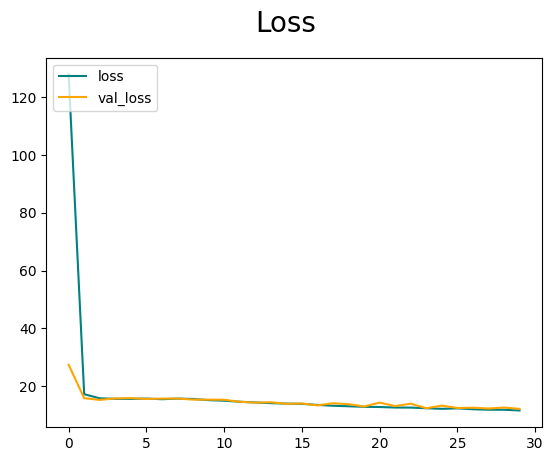

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

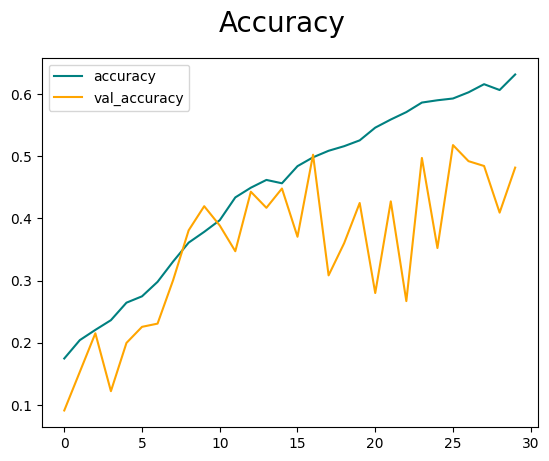

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

1/1 [==============================] - 0s 246ms/step


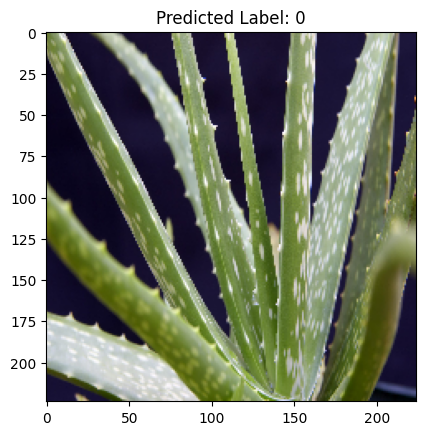

In [ ]:
new_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Aloe_Vera image.jpg', target_size=(224, 224))

# Preprocess the image
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)

# Make a prediction
prediction = cnn.predict(new_image_array)

# Get the predicted class label
predicted_label = np.argmax(prediction, axis=1)[0]

# Display the image and the predicted label
plt.imshow(new_image)
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_plant(image_path):
    # Load the pre-trained CNN model
    cnn = tf.keras.models.load_model('path/to/model.h5')
    
    # Load the image and preprocess it
    new_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
    new_image_array = np.expand_dims(new_image_array, axis=0)
    
    # Define the class names
    class_names = ['Aloe Vera', 'Areca Palm', 'Money Plant', 'Peace Lily', 'Philodendron', 'Rubber Plant', 'Snake Plant', 'Spider Plant', 'Tulsi', 'ZZ Plant']
    
    # Make a prediction
    prediction = cnn.predict(new_image_array)
    
    # Get the predicted class label
    predicted_label = np.argmax(prediction, axis=1)[0]
    
    predicted_class_name = class_names[predicted_label]
    
    return predicted_class_name

1/1 [==============================] - 0s 19ms/step


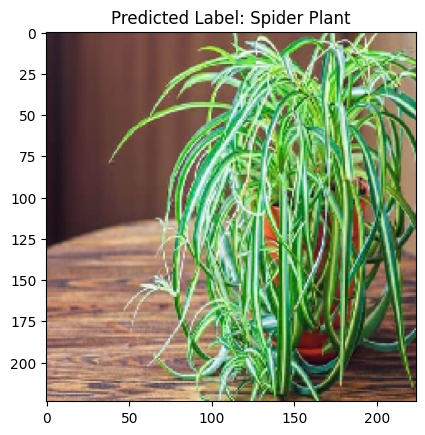

In [ ]:
new_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/spider_plant_img.jpg', target_size=(224, 224))

# Preprocess the image
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)

class_names = ['Aloe Vera', 'Areca Palm', 'Money Plant', 'Peace Lily', 'Philodendron', 'Rubber Plant', 'Snake Plant', 'Spider Plant', 'Tulsi', 'ZZ Plant']
# Make a prediction
prediction = cnn.predict(new_image_array)

# Get the predicted class label
predicted_label = np.argmax(prediction, axis=1)[0]

predicted_class_name = class_names[predicted_label]

# Display the image and the predicted label
plt.imshow(new_image)
plt.title(f'Predicted Label: {predicted_class_name}')
plt.show()

In [ ]:
cnn.save(os.path.join('/content/drive/MyDrive/models','plant_classification_m2'))

In [8]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
new_model = load_model(os.path.join('/content/drive/MyDrive/models','plant_classification_m2'))

In [ ]:
new_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/snake_plant_img.jpg', target_size=(224, 224))

# Preprocess the image
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)

1/1 [==============================] - 0s 96ms/step


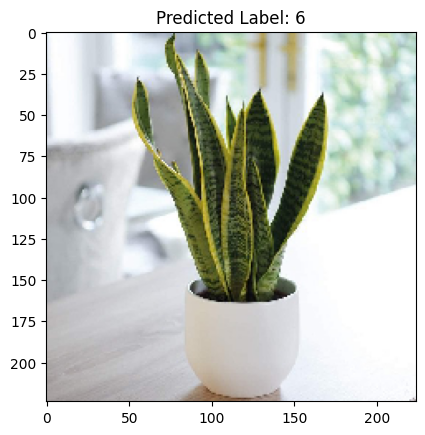

In [ ]:
prediction = new_model.predict(new_image_array)
predicted_label = np.argmax(prediction, axis=1)[0]

# Display the image and the predicted label
plt.imshow(new_image)
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_plant(image_path):
    # Load the pre-trained CNN model
    model = tf.keras.models.load_model('/content/drive/MyDrive/models/plant_classification_m2')
  
    # Load the image and preprocess it
    new_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
    new_image_array = np.expand_dims(new_image_array, axis=0)
    
    # Define the class names
    class_names = ['Aloe Vera', 'Areca Palm', 'Money Plant', 'Peace Lily', 'Philodendron', 'Rubber Plant', 'Snake Plant', 'Spider Plant', 'Tulsi', 'ZZ Plant']
    
    # Make a prediction
    prediction = model.predict(new_image_array)
    
    # Get the predicted class label
    predicted_label = np.argmax(prediction, axis=1)[0]
    
    predicted_class_name = class_names[predicted_label]

    plt.imshow(new_image)
    plt.title(f'Predicted Label: {predicted_class_name}')
    plt.show()
    
    return predicted_class_name

1/1 [==============================] - 0s 108ms/step


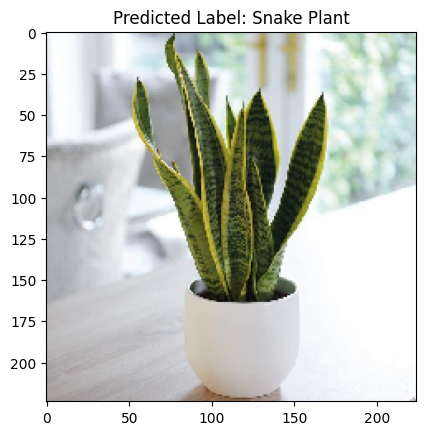

Snake Plant


In [16]:
predicted_class_name = predict_plant('/content/drive/MyDrive/snake_plant_img.jpg')
print(predicted_class_name)